In [1]:
from framework import FrameWork
#from framework import AveragedPerdiction
#from framework import BorexinoRecoilSpectrum
from framework import SuperkPrediction


import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex']=True
plt.style.use('classic')


In [2]:

frame            = FrameWork()

#np.ones((self.total_days,1))*survival_probablity[np.newaxis,:]


#frame.norm['B8'] = [5.25e-4] #cm^-2 s^-1 10^10 from SNO

#dr_dldt          = frame[[34.4,0]] ##theta_12 from SuperK bestfit



In [3]:
su_pr = 1*np.ones(155)

total_days = frame.total_days
su_pr = np.ones((total_days,1))*su_pr[np.newaxis,:]

total_event          = frame[su_pr,0]

[29.65099295]


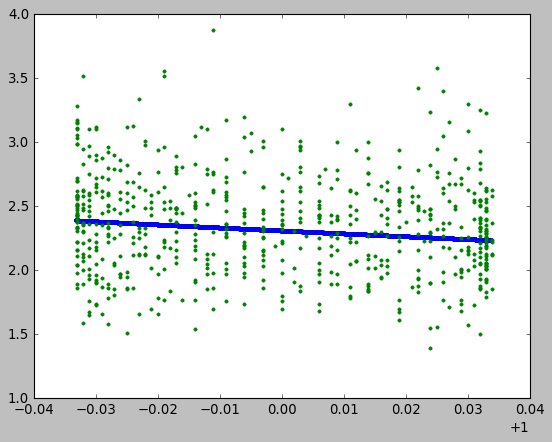

In [4]:
plt.plot(frame.distance**2,0.44*total_event,'.')
plt.plot(frame.data[:,6],frame.data[:,3],'.')
#plt.plot(frame.lat_sun,total_event,'.')
print(frame.borom_unoscilated_total)
#plt.plot(frame.distance,(32.5/365.25)*frame.borom_unoscilated_total,'.')

In [5]:
bin_predict,dpredict = SuperkPrediction(frame.data,frame.total_days,total_event,frame.distance)

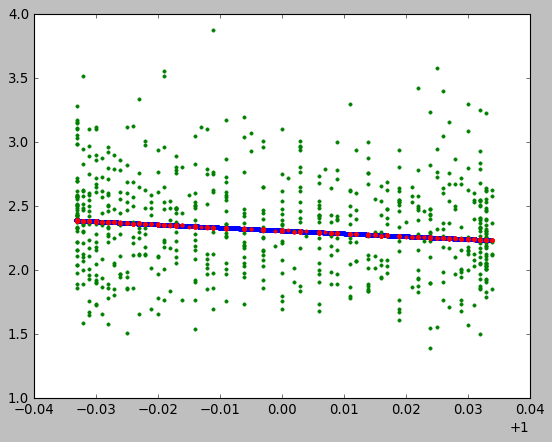

In [6]:
plt.plot(frame.distance**2,0.44*total_event,'.')
plt.plot(frame.data[:,6],frame.data[:,3],'.')
plt.plot(frame.data[:,6],0.44*bin_predict,'.')


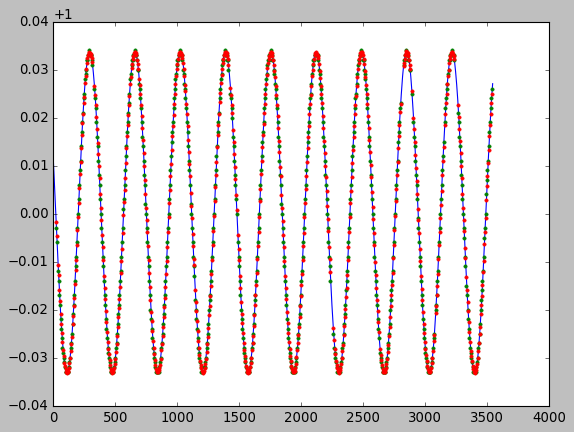

In [15]:
plt.plot(np.arange(0,frame.total_days,1),frame.distance**2)
plt.plot(frame.data[:,0],frame.data[:,6],'g.')
plt.plot(frame.data[:,0],dpredict**2,'r.')

In [8]:
print(b8spec.shape)

(155, 2)
